In [54]:
!pip install pmdarima


In [56]:
import pandas as pd
import numpy as np
%matplotlib inline

# импорт SARIMAX 
from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # для определения (p,q) 
from statsmodels.tsa.seasonal import seasonal_decompose      # для ETS графиков
from pmdarima import auto_arima                              # для поиска ARIMA моделей

# метрики
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

# для игнорирования предупреждений (опционально)
# import warnings
# warnings.filterwarnings("ignore")

# Загрузка датасета
df = pd.read_csv('HospitalityEmployees.csv',index_col='Date',parse_dates=True)

df.head()

,Employees
Date,
1990-01-01,1064.5
1990-02-01,1074.5
1990-03-01,1090.0
1990-04-01,1097.4
1990-05-01,1108.7


In [57]:
#В df 348 записей и 1 колонка. Данные представляют собой 
#численность сотрудников в тысячах человек в среднем за месяц
#с января 1990 года по декабрь 2018 года.

In [58]:
print(len(df))

348


In [59]:
print(df.head())

            Employees
Date                 
1990-01-01     1064.5
1990-02-01     1074.5
1990-03-01     1090.0
1990-04-01     1097.4
1990-05-01     1108.7


### 1. Постройте график временного ряда


[Text(0.5, 0, ''), Text(0, 0.5, 'Thousands of Persons')]

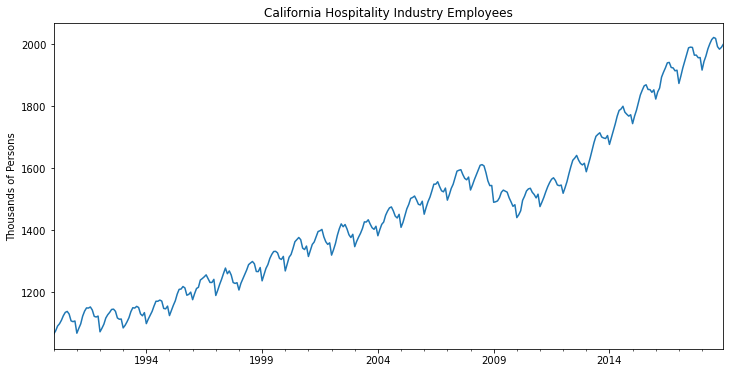

In [60]:
title = 'California Hospitality Industry Employees' 
ylabel = 'Thousands of Persons' 
xlabel = '' 
ax = df['Employees'].plot(figsize=(12,6),title=title) 
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)


### 2. Выполните ETS декомпозицию
Используя аддитивную модель ('additive').

In [61]:
r = seasonal_decompose(df['Employees'],model='additive')

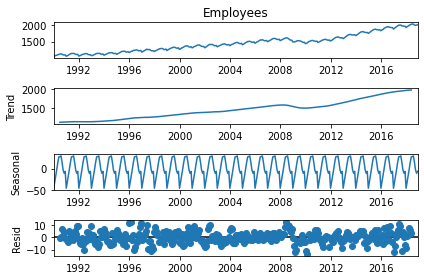

In [62]:
r.plot();

### 3. Запустите <tt>pmdarima.auto_arima</tt> чтобы получить набор параметров
Это может занять некоторое время, так как необходимо оценить множество комбинаций.

In [63]:
auto_arima(df['Employees'],seasonal=True,m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  348
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood               -1098.252
Date:                              Sun, 19 Dec 2021   AIC                           2208.504
Time:                                      18:36:04   BIC                           2231.600
Sample:                                           0   HQIC                          2217.700
                                              - 348                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9246      0.045     20.572      0.000       0.836       1.013
ma.L1         -0.9441      0.070    -13.541      0.000      -1.081      -0.807
ma.L2          0.1287      0.060      2.157      0.031       0.012       0.246
ar.S.L12       0.9972      0.001    706.317      0.000       0.994       1.000
ma.S.L12      -0.7494      0.043    -17.353      0.000      -0.834      -0.665
sigma2        29.2905      1.716     17.068      0.000      25.927      32.654
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                67.40
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -0.11
Prob(H) (two-sided):                  0.40   Kurtosis:                         5.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Ожинаемый результат ARIMA (0,1,0) с сезонностью (2,0,0,12).
### 4. Разделите данные на train/test 
Установите один год (12 записей) для тестирования. Есть несколько способов сделать это!

In [64]:
train = df.iloc[:len(df)-12]
test = df.iloc[len(df)-12:]

In [65]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

### 5. Обучите SARIMA(0,1,0)(2,0,0,12) на train

In [66]:
model = SARIMAX(train['Employees'],order=(1, 1, 2),seasonal_order=(1, 0, 1, 12))
results = model.fit()
results.summary()

C:\Users\anoma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\anoma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\anoma\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\anoma\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\anoma\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sar

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                            Employees   No. Observations:                  336
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood               -1058.058
Date:                              Sun, 19 Dec 2021   AIC                           2128.117
Time:                                      18:36:35   BIC                           2151.001
Sample:                                  01-01-1990   HQIC                          2137.240
                                       - 12-01-2017                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9242      0.043     21.309      0.000       0.839       1.009
ma.L1         -0.9586      0.070    -13.608      0.000      -1.097      -0.821
ma.L2          0.1498      0.061      2.448      0.014       0.030       0.270
ar.S.L12       0.9973      0.001    733.473      0.000       0.995       1.000
ma.S.L12      -0.7522      0.044    -17.167      0.000      -0.838      -0.666
sigma2        28.7570      1.683     17.084      0.000      25.458      32.056
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                73.31
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.91   Skew:                            -0.17
Prob(H) (two-sided):                  0.63   Kurtosis:                         5.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [67]:
model = SARIMAX(train['Employees'],order=(0, 1, 0),seasonal_order=(2, 0, 0, 12)) #изменяем параметры
results = model.fit()
results.summary()

C:\Users\anoma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\anoma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                          Employees   No. Observations:                  336
Model:             SARIMAX(0, 1, 0)x(2, 0, 0, 12)   Log Likelihood               -1095.407
Date:                            Sun, 19 Dec 2021   AIC                           2196.814
Time:                                    18:36:37   BIC                           2208.256
Sample:                                01-01-1990   HQIC                          2201.375
                                     - 12-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.5204      0.040     13.051      0.000       0.442       0.599
ar.S.L24       0.4385      0.041     10.593      0.000       0.357       0.520
sigma2        37.1907      2.165     17.175      0.000      32.947      41.435
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                56.66
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               1.06   Skew:                            -0.35
Prob(H) (two-sided):                  0.74   Kurtosis:                         4.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### 6. Получите прогнозируемые значения

In [68]:
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end, 
dynamic=False, typ='levels').rename(' Predictions SARIMAX(1, 1, 2)x(1, 0, [1], 12)')

<AxesSubplot:xlabel='Date'>

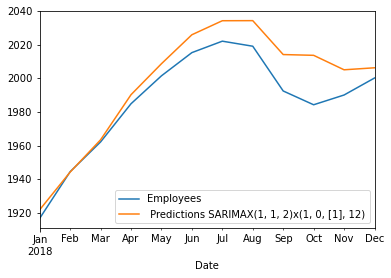

In [69]:
test['Employees'].plot(legend=True)
predictions.plot(legend=True)

### 7. Нарисуйте графики прогнозируемых и известных значений


In [70]:
title = 'California Hospitality Industry Employees' 
ylabel = 'Thousands of Persons' 
xlabel = '' 

[Text(0.5, 0, ''), Text(0, 0.5, 'Thousands of Persons')]

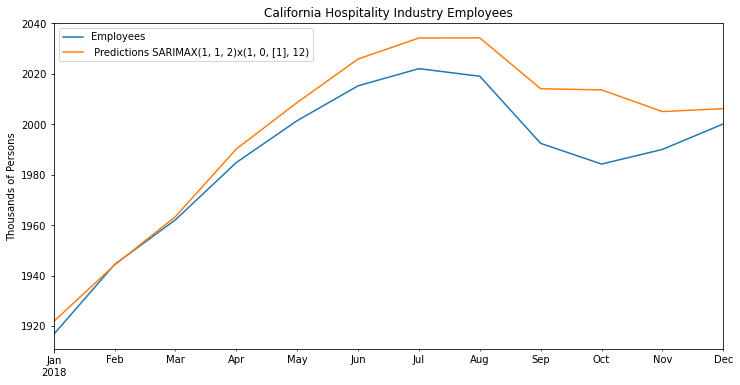

In [71]:
ax = test['Employees'].plot(legend=True, figsize=(12,6),title=title) #добавлем заголовок
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)

In [72]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

mse_error = mean_squared_error(test['Employees'], predictions)
rmse_error = rmse(test['Employees'], predictions)

print(f'SARIMA(0,1,0)(2,0,0,12) MSE Error: {mse_error:11.10}')  
print(f'SARIMA(0,1,0)(2,0,0,12) RMSE Error: {rmse_error:11.10}')

SARIMA(0,1,0)(2,0,0,12) MSE Error: 182.8506635
SARIMA(0,1,0)(2,0,0,12) RMSE Error:  13.5222285


### 8. Оцените качество модели с помощью MSE и RMSE


In [73]:
print(f'SARIMA(0,1,0)(2,0,0,12) MSE Error: {mse_error:11.10}') 
print(f'SARIMA(0,1,0)(2,0,0,12) RMSE Error: {rmse_error:11.10}') 

SARIMA(0,1,0)(2,0,0,12) MSE Error: 182.8506635
SARIMA(0,1,0)(2,0,0,12) RMSE Error:  13.5222285


### 9. Натренируйте модель на полном датасете и предскажите на год вперед

In [76]:
model = SARIMAX(df['Employees'],order=(1, 1, 
2),seasonal_order=(1, 0, 1, 12))
results = model.fit()
results.summary()

C:\Users\anoma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\anoma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\anoma\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\anoma\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\anoma\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sar

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                            Employees   No. Observations:                  348
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood               -1098.252
Date:                              Sun, 19 Dec 2021   AIC                           2208.504
Time:                                      18:37:25   BIC                           2231.600
Sample:                                  01-01-1990   HQIC                          2217.700
                                       - 12-01-2018                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9246      0.045     20.572      0.000       0.836       1.013
ma.L1         -0.9441      0.070    -13.541      0.000      -1.081      -0.807
ma.L2          0.1287      0.060      2.157      0.031       0.012       0.246
ar.S.L12       0.9972      0.001    706.317      0.000       0.994       1.000
ma.S.L12      -0.7494      0.043    -17.353      0.000      -0.834      -0.665
sigma2        29.2905      1.716     17.068      0.000      25.927      32.654
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                67.40
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -0.11
Prob(H) (two-sided):                  0.40   Kurtosis:                         5.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [77]:
fcast = results.predict(len(df)-1,len(df)+11,typ='levels').rename('SARIMAX(1, 1, 2)x(1, 0, [1], 12) ')

### 10. Постройте график предсказаний и график исходных данных


<AxesSubplot:>

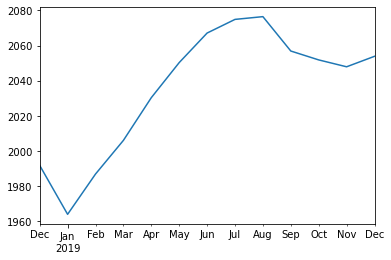

In [78]:
fcast.plot()

In [79]:
title = 'California Hospitality Industry Employees' 
ylabel = 'Thousands of Persons' 
xlabel = ''

[Text(0.5, 0, ''), Text(0, 0.5, 'Thousands of Persons')]

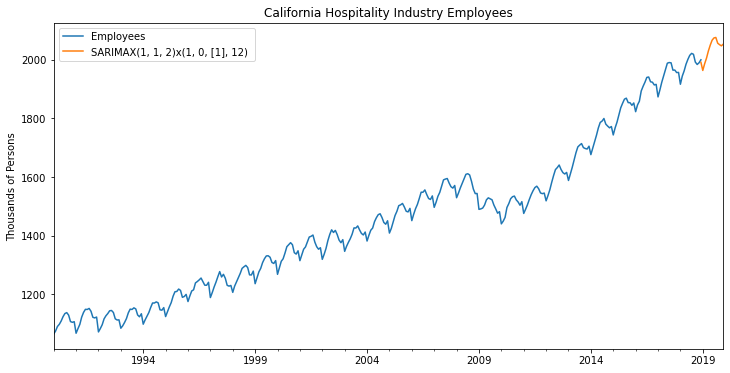

In [80]:
ax = df['Employees'].plot(legend=True, figsize=(12,6),title=title) 
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)

In [43]:
!pip install pystan

In [81]:
 !pip install fbprophet

In [45]:
conda install -c conda-forge fbprophet

Note: you may need to restart the kernel to use updated packages.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: ...working... done

## Package Plan ##


  environment location: C:\Users\anoma\anaconda3

  added / updated specs:
    - fbprophet


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.11.0               |   py38haa244fe_0        16.9 MB  conda-forge
    convertdate-2.3.2          |     pyhd8ed1ab_0          37 KB  conda-forge
    ephem-4.1.3                |   py38h294d835_0         1.4 MB  conda-forge
    fbprophet-0.7.1            |   py38h7ae7562_0         572 KB  conda-forge
    hijri-converter-2.2.2      |     pyhd8ed1ab_0          17 KB  conda-forge
    holidays-0.11.3.1   



==> WARNING: A newer version of conda exists. <==
  current version: 4.10.1
  latest version: 4.11.0

Please update conda by running

    $ conda update -n base -c defaults conda




    lunarcalendar-0.0.9        |             py_0          20 KB  conda-forge
    m2w64-binutils-2.25.1      |                5        44.3 MB  conda-forge
    m2w64-bzip2-1.0.6          |                6         102 KB  conda-forge
    m2w64-crt-git-5.0.0.4636.2595836|                2         3.4 MB  conda-forge
    m2w64-gcc-5.3.0            |                6        40.8 MB  conda-forge
    m2w64-gcc-ada-5.3.0        |                6        33.3 MB  conda-forge
    m2w64-gcc-fortran-5.3.0    |                6        10.2 MB  conda-forge
    m2w64-gcc-objc-5.3.0       |                6        15.2 MB  conda-forge
    m2w64-headers-git-5.0.0.4636.c0ad18a|                2         5.6 MB  conda-forge
    m2w64-isl-0.16.1           |                2         655 KB  conda-forge
    m2w64-libiconv-1.14        |                6         1.5 MB  conda-forge
    m2w64-libmangle-git-5.0.0.4509.2e5a9a2|                2          23 KB  conda-forge
    m2w64-make-4.1.2351.a80a8b8|       